In [3]:
%env KERAS_BACKEND = tensorflow

env: KERAS_BACKEND=tensorflow


In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [5]:
from keras.datasets import imdb

In [6]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [7]:
for i in range(10):
    print(len(x_train[i]), end=', ')

218, 189, 141, 550, 147, 43, 123, 562, 233, 130, 

In [8]:
from keras.preprocessing import sequence

In [9]:
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [10]:
for i in range(10):
    print(len(x_train[i]), end=', ')

100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 

In [11]:
x_trash = sequence.pad_sequences(x_train, maxlen=150)

In [12]:
x_trash[87] #前面補 0

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,   79,   12,   14,    9,  691,
          6, 8338,    5, 7524,   20,   93, 3084,   34,   94,    2,  631,
        956,    5, 4905,    2, 3981,  671,    8,    2, 1426,   23,   35,
        311,  772,   41,  544,  584,   13,  100, 1227,  842,    4, 1588,
        120,   33,  312,  211, 3413, 5611,   68,    2,  120,    4, 4197,
          2,   15,    2,   14,  431,  249,  136,  776, 4905, 1027,    8,
          2,   41,    2,    2,   23,    4,  890,    7, 1316,   11,    6,
          2,  428, 2727, 1735,   24,  163,   24,  204,   24,  221,   24,
          6,   52,   20,    4,  693,  241,  675,    9,    4,  959,    7,
          2,  120, 9719,   92,  437,  129,   58])

In [13]:
x_train.shape

(25000, 100)

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM

In [15]:
model = Sequential() # 開一個空的網路

In [16]:
model.add(Embedding(10000, 128)) # 這部份自己會去學習最好的 embedding 方式

In [17]:
model.add(LSTM(150))

In [18]:
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 150)               167400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 1,447,551
Trainable params: 1,447,551
Non-trainable params: 0
_________________________________________________________________


In [25]:
#!pip install pydot
!pip install graphviz
!pip install pydotplus

In [24]:
import pydotplus as pydot
pydot.find_graphviz()

{'circo': 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\circo.exe',
 'dot': 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\dot.exe',
 'fdp': 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\fdp.exe',
 'neato': 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\neato.exe',
 'sfdp': 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\sfdp.exe',
 'twopi': 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\twopi.exe'}

In [22]:
from keras.utils.vis_utils import plot_model

In [23]:
plot_model(model, show_shapes=True, to_file="rnn.png")

![](rnn.png)

In [ ]:
model.fit(x_train, y_train,
         batch_size=32,
         epochs=2)

In [123]:
score = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 64s 3ms/step


In [124]:
print('loss', score[0])
print('acc:', score[1])

loss 0.5638187509536743
acc: 0.78416


In [190]:
x = np.linspace(-5, 10, 200)

In [191]:
lamba = 1.05070098
alpha = 1.67326324

In [194]:
x0 = x*(x>0)
x1 = x*(x<0)

y0 = lamba * x0
y1 = lamba * (alpha * np.exp(x1) - alpha)

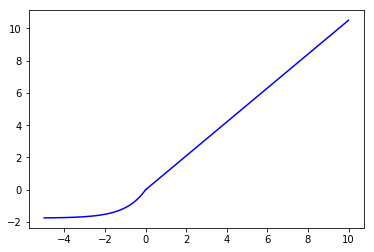

In [195]:
plt.plot(x0, y0, c='b')
plt.plot(x1, y1, c='b')

In [268]:
x = np.linspace(0, 10, 200)
y = np.sin(2*x) + 0.3 * np.random.randn(200)

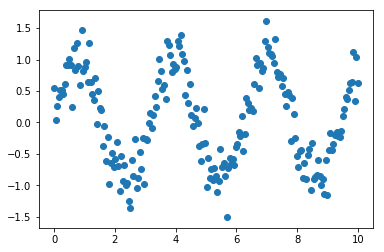

In [269]:
plt.scatter(x,y)

In [260]:
x_train = x
y_train = y

In [261]:
x_train.shape

(200,)

In [262]:
from keras.models import Sequential

In [263]:
model = Sequential()

In [264]:
model.add(Dense(32, input_dim=1, activation='relu'))
model.add(Dense(1, input_dim=32, activation='relu'))

In [265]:
model.compile(loss='mean_squared_error',
             optimizer='sgd',
             metrics=['accuracy'])

In [266]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 32)                64        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 33        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [267]:
model.fit(x_train, y_train,
         epochs=100)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.9881 - acc: 0.0000e+00
Epoch 2/100
200/200 [==============================] - 0s 315us/step - loss: 0.5900 - acc: 0.0000e+00
Epoch 3/100
200/200 [==============================] - 0s 315us/step - loss: 0.5900 - acc: 0.0000e+00
Epoch 4/100
200/200 [==============================] - 0s 315us/step - loss: 0.5900 - acc: 0.0000e+00
Epoch 5/100
200/200 [==============================] - 0s 325us/step - loss: 0.5900 - acc: 0.0000e+00
Epoch 6/100
200/200 [==============================] - 0s 280us/step - loss: 0.5900 - acc: 0.0000e+00
Epoch 7/100
200/200 [==============================] - 0s 318us/step - loss: 0.5900 - acc: 0.0000e+00
Epoch 8/100
200/200 [==============================] - 0s 383us/step - loss: 0.5900 - acc: 0.0000e+00
Epoch 9/100
200/200 [==============================] - 0s 392us/step - loss: 0.5900 - acc: 0.0000e+00
Epoch 10/100
200/200 [==============================] - 0s 307us/step - loss: 0.5900

In [257]:
y_pred = model.predict(x_train)

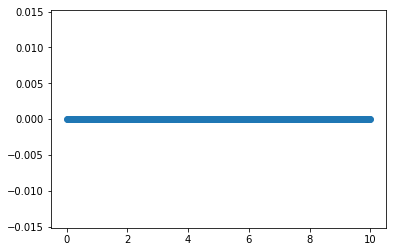

In [258]:
plt.scatter(x_train, y_pred)